# Computationally Visualizing Crystals Pt. 2
### Christina C. Lee

### Category: General Audience

### Crystals Series
* [Fundamental Crystal Shapes](../General/Crystal-Shapes.ipynb)
* [MultiSite Unit Cells](../General/MultiSite-Unit-Cells.ipynb)

Time to one-up the Bravais lattice from Part 1.  Many beautiful lattices don't adhere to the "every site the same" policy.  They still repeat, but just take a little bit longer to get around to doing so.  

Take the Kagome Lattice, named for the Japanese style of basket weaving, below,
![KagomeLatticepic](../images/MultiSite/kagomesvg.png) 

![Kagomebasket](../images/MultiSite/kagomebasket.JPG) <sub>Wikimedia commons </sub>

If we look at the stars at the center of triangles, we can recognize a point triangular Bravais lattice.  Now each of those stars stands for a grouping of three sites in a <i>Unit Cell</i>.  According to <a href="http://chemwiki.ucdavis.edu/Physical_Chemistry/Physical_Properties_of_Matter/Phases_of_Matter/Solids/Unit_Cell">Chem Wiki</a>, a unit cell is:
>A unit cell is the most basic and least volume consuming repeating structure of any solid. It is used to visually simplify the crystalline patterns solids arrange themselves in. 

Now I chose these triangles to be be the unit cells above and in my computational representation below, but can you think of any other ways to represent the unit cell?

Turns out, there isn't a unique way.  We can go further and define the <i>Wigner-Seitz</i> unit cell, which uses the Bravais translations to pick out just ONE of the various possible definitions.  

In my line of work though, we often use either the easiest to write down, or the one that has the symmetries we want.

### Introducing Some Lattice Options

You saw Kagome above. 

The options I've put in now are:
* 2D
  * honeycomb
  * kagome
  * shuriken aka しゅりけん, 手裏剣, or Square-Kagome
* 3D
  * diamond
  * pyrochlore

The ones implemented here, except for diamond, are frustrated lattices that I work with in my research. Honeycomb is well known in condensed matter physics for being the structure of graphene, an extremely important material right now, though I work with it in terms of the Kitaev spin model.  Kagome and Pyrochlore are also popular models within my community.  The shuriken lattice is more uncommon, but gaining ground in the frustration community. 

#### <center> Japanese Shurikens- a type of ninja fighting star
![shurikens](../images/MultiSite/Shurikens.jpg)
<sub><sub> By kaex0r (http://www.flickr.com/photos/kaex0r414/191765028/) [CC BY 2.0 (http://creativecommons.org/licenses/by/2.0)], via Wikimedia Commons

In [1]:
# importing our packages
using Plots
gr()

Plots.GRBackend()

In [2]:
lattice="shuriken";

Nx=3;
Ny=3;
Nz=1;

In [3]:
# A cell to just evaluate
# This one sets the unit vectors (a,b,c) for the different unit cells
# Can you guess what a lattice will look like by looking at the vectors?
if(lattice=="honeycomb") #also the graphite lattice
    d=2;
    Ncell=2;
    unit=[[0 0 0]
        [cos(π/6) sin(π/6) 0]];
    a=[sqrt(3),0,0];
    b=[sqrt(3)/2,3/2,0];
    c=[0,0,1];
elseif(lattice=="kagome" || lattice=="かごめ")
    d=2;
    Ncell=3;
    unit=[[0 0 0]
          [1 0 0]
        [.5 sqrt(3)/2 0]];
    a=[2,0,0];       #Look familiar? Checkout pt from Pt. 1
    b=[1, sqrt(3), 0];
    c=[0,0,1];
elseif(lattice=="shuriken"|| lattice=="しゅりけん" || lattice=="手裏剣")
    d=2;
    Ncell=6;
    unit=[[0 0 0]
          [.5 0 0]
          [0 .5 0]
          [.5 .5 0]
        [.5+.25*sqrt(3) .25 0]
        [.25 .5+.25*sqrt(3) 0]];
    a=[.5+.5*sqrt(3),0,0];
    b=[0,.5+.5*sqrt(3),0];
    c=[0,0,1];
elseif(lattice=="diamond")
    d=3;
    Ncell=2;
    unit=[[0 0 0] 
          [.25 .25 .25]];
    a=[.5,.5,0];    #Look familiar? Checkout fcc from Pt.1
    b=[.5,0,.5];
    c=[0,.5,.5];
elseif(lattice=="pyrochlore")
    d=3;
    Ncell=4;
    unit=[[0 0 0]
        [.25 .25 0]
        [.25 0 .25]
        [0 .25 .25]];
    a=[.5,.5,0];
    b=[.5,0,.5];
    c=[0,.5,.5];
    
else
    println("Please have a correct lattice")
end
"Cell finished"

"Cell finished"

### Connections to Bravais Lattices

If you look at some of the comments above, and checkout the basis vectors from Crystal Shapes, like pt,
        \begin{equation}
            a=[1,0,0]\;\;\;\;\;\;\;\;\; b=[.5,\frac{\sqrt{3}}{2},0],
        \end{equation}
you'll notice they're the same except for a scaling factor.  This has to be true, since only 14 different patterns tile 3D space uniquely.  

In [4]:
# Another cell to just evaluate
# Here we set up some numbers and matrices for our computation
N=Nx*Ny*Nz*Ncell;    #The total number of sites
aM=transpose(repeat(a,outer=[1,Ncell]));
bM=transpose(repeat(b,outer=[1,Ncell*Nx])); #these allow us to copy an entire row or layer at once
cM=transpose(repeat(c,outer=[1,Ncell*Nx*Ny]));

X=Array{Float64}(undef,N,3);  #where we store the positions
"Cell finished"

"Cell finished"

In [5]:
# Another cell to just evaluate
# Here we are actually calculating the positions for every site
for i in 1:Nx    #for the first row
    X[Ncell*i-Ncell+1:Ncell*i,:]=unit.+(i-1)*aM;
end

for j in 2:Ny    #copying the first row into the first layer
    X[Ncell*Nx*(j-1).+(1:Ncell*Nx),:]=X[1:Ncell*Nx,:].+(j-1)*bM;
end

for j in 2:Nz    #copying the first layer into the entire cube
    X[Ncell*Ny*Nx*(j-1).+(1:Ncell*Nx*Ny),:]=X[1:Ncell*Nx*Ny,:].+(j-1)*cM;
end
"Cell finished"

"Cell finished"

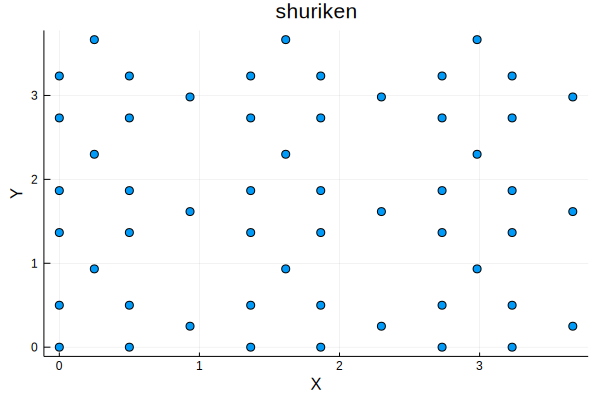

In [6]:
scatter(X[:,1],X[:,2])
# scatter(X[:,1],X[:,2],X[:,3])
plot!(title=lattice,xlabel="X",ylabel="Y",zlabel="Z",legend=false)

### Perdy Pictures 
From these plots, some 3D structures like the pyrochlore are hard to visualize.  So here's a nice graphic I made that might help a little bit more.
#### <center> Pyrochlore

![fancypyrochlore](../images/MultiSite/pyrochloresvg2.png)
![honeycomb](../images/MultiSite/honeycomb.png)

The honeycomb, like several other lattices you see around here, is <i>bipartite</i>.  You can see in my image that black sites are only next to white sites, and vice versa.  This property can make the system much easier to work with.

If you keep reading, Please Do!, these lattices will keep cropping up again and again.  I'll probably throw in some new ones as well.  

Anyway, if you've had too many lattices, will move onto some Quantum Mechanics to look at atomic orbitals soon!